# Analysis for SSFA project: Preprocessing of data

## Table of contents
1. [Used packages](#imports)
1. [Global settings](#settings)
1. [Load data](#load)
1. [Data conversion](#conversion)
1. [Data exploration](#exploration)
1. [Write out](#write)

## Used packages <a name="imports"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pickle
import arviz as az
import pymc3 as pm
from matplotlib.colors import to_rgb
import scipy.stats as stats 
from IPython.display import display
import matplotlib as mpl

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Global settings <a name="settings"></a>

#### Plotting

In [2]:
widthMM = 190 
widthInch = widthMM / 25.4
ratio = 0.66666
heigthInch = ratio*widthInch

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
sns.set_style("ticks")

dpi = 300

## Load data <a name="load"></a>

In [3]:
inFile = '../../R_analysis/derived_data/SSFA_all_data.xlsx'

#### Verify file
Compute hash sum of loaded file. If it is the same as the one reported below, the file content is the same.

In [4]:
checksum_origin = 'd0ccdc8387aac3732551c8a4d659a7bd'

In [5]:
from filehash import FileHash
md5hasher = FileHash('md5')
checksum = md5hasher.hash_file(inFile)
checksum

'd0ccdc8387aac3732551c8a4d659a7bd'

In [6]:
checksum == checksum_origin

True

#### Show data

In [7]:
df = pd.read_excel(inFile)
df

,Dataset,Name,Software,Diet,Treatment,Before.after,epLsar,R²,Asfc,Smfc,HAsfc9,HAsfc81,NewEplsar
0,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_1,ConfoMap,Dry Lucerne,NaN,NaN,0.001960,0.998370,14.293226,0.415394,0.164462,0.368124,0.018424
1,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_1,Toothfrax,Dry Lucerne,NaN,NaN,0.001471,0.999343,12.925787,0.119219,0.181994,0.336894,NaN
2,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_2,ConfoMap,Dry Lucerne,NaN,NaN,0.003662,0.999112,12.905549,0.440818,0.171361,0.417234,0.018889
3,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_2,Toothfrax,Dry Lucerne,NaN,NaN,0.002693,0.999514,11.999816,0.119219,0.158604,0.381862,NaN
4,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_3,ConfoMap,Dry Lucerne,NaN,NaN,0.003140,0.998935,13.666070,0.440818,0.130529,0.352169,0.018703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Sheeps,L8-Ovis-90730-lm2sin-a,Toothfrax,Grass+Dust,NaN,NaN,0.004424,0.999360,1.819802,1.408678,0.836560,1.111706,NaN
276,Sheeps,L8-Ovis-90764-lm2sin-a,ConfoMap,Grass+Dust,NaN,NaN,0.003403,0.997552,2.312486,0.939718,0.754059,1.610626,0.018978
277,Sheeps,L8-Ovis-90764-lm2sin-a,Toothfrax,Grass+Dust,NaN,NaN,0.003139,0.999739,2.758297,0.133366,0.955699,1.831721,NaN
278,Sheeps,L8-Ovis-90814-lm2sin-a,ConfoMap,Grass+Dust,NaN,NaN,0.001220,0.998831,1.414701,1.696316,0.370552,0.785022,0.017498


#### Create unfied column for treatment

In [8]:
df = df.assign(Treatment=df.apply(lambda row: row['Diet'] if str(row['Treatment']) == "nan" else row['Treatment'],axis=1))
df

,Dataset,Name,Software,Diet,Treatment,Before.after,epLsar,R²,Asfc,Smfc,HAsfc9,HAsfc81,NewEplsar
0,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_1,ConfoMap,Dry Lucerne,Dry Lucerne,NaN,0.001960,0.998370,14.293226,0.415394,0.164462,0.368124,0.018424
1,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_1,Toothfrax,Dry Lucerne,Dry Lucerne,NaN,0.001471,0.999343,12.925787,0.119219,0.181994,0.336894,NaN
2,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_2,ConfoMap,Dry Lucerne,Dry Lucerne,NaN,0.003662,0.999112,12.905549,0.440818,0.171361,0.417234,0.018889
3,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_2,Toothfrax,Dry Lucerne,Dry Lucerne,NaN,0.002693,0.999514,11.999816,0.119219,0.158604,0.381862,NaN
4,GuineaPigs,capor_2CC4B1_txP4_#1_1_100xL_3,ConfoMap,Dry Lucerne,Dry Lucerne,NaN,0.003140,0.998935,13.666070,0.440818,0.130529,0.352169,0.018703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Sheeps,L8-Ovis-90730-lm2sin-a,Toothfrax,Grass+Dust,Grass+Dust,NaN,0.004424,0.999360,1.819802,1.408678,0.836560,1.111706,NaN
276,Sheeps,L8-Ovis-90764-lm2sin-a,ConfoMap,Grass+Dust,Grass+Dust,NaN,0.003403,0.997552,2.312486,0.939718,0.754059,1.610626,0.018978
277,Sheeps,L8-Ovis-90764-lm2sin-a,Toothfrax,Grass+Dust,Grass+Dust,NaN,0.003139,0.999739,2.758297,0.133366,0.955699,1.831721,NaN
278,Sheeps,L8-Ovis-90814-lm2sin-a,ConfoMap,Grass+Dust,Grass+Dust,NaN,0.001220,0.998831,1.414701,1.696316,0.370552,0.785022,0.017498


In [9]:
df.Treatment.unique()

array(['Dry Lucerne', 'Dry Grass', 'Dry Bamboo', 'BrushDirt', 'RubDirt',
       'Control', 'BrushNoDirt', 'Clover', 'Clover+Dust', 'Grass',
       'Grass+Dust'], dtype=object)

#### Sort data for later enumeration

In [10]:
df = df.sort_values(["Dataset","Treatment","Name","Software"]).reset_index(drop=True)
df

,Dataset,Name,Software,Diet,Treatment,Before.after,epLsar,R²,Asfc,Smfc,HAsfc9,HAsfc81,NewEplsar
0,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_1,ConfoMap,Dry Bamboo,Dry Bamboo,NaN,0.004417,0.998739,10.805118,0.347586,0.130091,0.355639,0.019460
1,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_1,Toothfrax,Dry Bamboo,Dry Bamboo,NaN,0.004721,0.999560,10.320730,0.119219,0.135471,0.361833,NaN
2,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_2,ConfoMap,Dry Bamboo,Dry Bamboo,NaN,0.005866,0.997985,13.610750,0.391436,0.179356,0.294377,0.020079
3,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_2,Toothfrax,Dry Bamboo,Dry Bamboo,NaN,0.005856,0.999467,13.199232,0.119219,0.169232,0.261217,NaN
4,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_3,ConfoMap,Dry Bamboo,Dry Bamboo,NaN,0.005042,0.998425,11.698166,0.308648,0.248885,0.413098,0.019722
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Sheeps,L8-Ovis-90730-lm2sin-a,Toothfrax,Grass+Dust,Grass+Dust,NaN,0.004424,0.999360,1.819802,1.408678,0.836560,1.111706,NaN
276,Sheeps,L8-Ovis-90764-lm2sin-a,ConfoMap,Grass+Dust,Grass+Dust,NaN,0.003403,0.997552,2.312486,0.939718,0.754059,1.610626,0.018978
277,Sheeps,L8-Ovis-90764-lm2sin-a,Toothfrax,Grass+Dust,Grass+Dust,NaN,0.003139,0.999739,2.758297,0.133366,0.955699,1.831721,NaN
278,Sheeps,L8-Ovis-90814-lm2sin-a,ConfoMap,Grass+Dust,Grass+Dust,NaN,0.001220,0.998831,1.414701,1.696316,0.370552,0.785022,0.017498


## Data conversion <a name="conversion"></a>
#### Map categories to numerical identifiers
The model needs to address the different levels by integer codes.

In [11]:
df["TreatmentNumber"] = df.Treatment.astype('category').cat.codes
df["SoftwareNumber"] = df.Software.astype('category').cat.codes
df["DatasetNumber"] = df.Dataset.astype('category').cat.codes
df["NameNumber"] = df.Name.astype('category').cat.codes
df

,Dataset,Name,Software,Diet,Treatment,Before.after,epLsar,R²,Asfc,Smfc,HAsfc9,HAsfc81,NewEplsar,TreatmentNumber,SoftwareNumber,DatasetNumber,NameNumber
0,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_1,ConfoMap,Dry Bamboo,Dry Bamboo,NaN,0.004417,0.998739,10.805118,0.347586,0.130091,0.355639,0.019460,5,0,0,116
1,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_1,Toothfrax,Dry Bamboo,Dry Bamboo,NaN,0.004721,0.999560,10.320730,0.119219,0.135471,0.361833,NaN,5,1,0,116
2,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_2,ConfoMap,Dry Bamboo,Dry Bamboo,NaN,0.005866,0.997985,13.610750,0.391436,0.179356,0.294377,0.020079,5,0,0,117
3,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_2,Toothfrax,Dry Bamboo,Dry Bamboo,NaN,0.005856,0.999467,13.199232,0.119219,0.169232,0.261217,NaN,5,1,0,117
4,GuineaPigs,capor_2CC6B1_txP4_#1_1_100xL_3,ConfoMap,Dry Bamboo,Dry Bamboo,NaN,0.005042,0.998425,11.698166,0.308648,0.248885,0.413098,0.019722,5,0,0,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Sheeps,L8-Ovis-90730-lm2sin-a,Toothfrax,Grass+Dust,Grass+Dust,NaN,0.004424,0.999360,1.819802,1.408678,0.836560,1.111706,NaN,9,1,2,51
276,Sheeps,L8-Ovis-90764-lm2sin-a,ConfoMap,Grass+Dust,Grass+Dust,NaN,0.003403,0.997552,2.312486,0.939718,0.754059,1.610626,0.018978,9,0,2,52
277,Sheeps,L8-Ovis-90764-lm2sin-a,Toothfrax,Grass+Dust,Grass+Dust,NaN,0.003139,0.999739,2.758297,0.133366,0.955699,1.831721,NaN,9,1,2,52
278,Sheeps,L8-Ovis-90814-lm2sin-a,ConfoMap,Grass+Dust,Grass+Dust,NaN,0.001220,0.998831,1.414701,1.696316,0.370552,0.785022,0.017498,9,0,2,53


Prepare dictionaries to be able to remap to names later

In [12]:
dictTreatment = dict( zip( df['Treatment'].astype('category').cat.codes, df['Treatment'] ) )
dictTreatment

{5: 'Dry Bamboo',
 6: 'Dry Grass',
 7: 'Dry Lucerne',
 0: 'BrushDirt',
 1: 'BrushNoDirt',
 4: 'Control',
 10: 'RubDirt',
 2: 'Clover',
 3: 'Clover+Dust',
 8: 'Grass',
 9: 'Grass+Dust'}

In [13]:
dictSoftware = dict( zip( df['Software'].astype('category').cat.codes, df['Software'] ) )
dictSoftware

{0: 'ConfoMap', 1: 'Toothfrax'}

In [14]:
dictDataset = dict( zip( df['Dataset'].astype('category').cat.codes, df['Dataset'] ) )
dictDataset

{0: 'GuineaPigs', 1: 'Lithics', 2: 'Sheeps'}

In [15]:
dictName = dict( zip( df['Name'].astype('category').cat.codes, df['Name'] ) )
dictName

{116: 'capor_2CC6B1_txP4_#1_1_100xL_1',
 117: 'capor_2CC6B1_txP4_#1_1_100xL_2',
 118: 'capor_2CC6B1_txP4_#1_1_100xL_3',
 119: 'capor_2CC6B1_txP4_#1_1_100xL_4',
 120: 'capor_2CC6B2_txP4_#1_1_100xL_1',
 121: 'capor_2CC6B2_txP4_#1_1_100xL_2',
 122: 'capor_2CC6B2_txP4_#1_1_100xL_3',
 123: 'capor_2CC6B2_txP4_#1_1_100xL_4',
 124: 'capor_2CC6G1_txP4_#1_1_100xL_1',
 125: 'capor_2CC6G1_txP4_#1_1_100xL_2',
 126: 'capor_2CC6G1_txP4_#1_1_100xL_3',
 127: 'capor_2CC6G1_txP4_#1_1_100xL_4',
 128: 'capor_2CC6G2_txP4_#1_1_100xL_1',
 129: 'capor_2CC6G2_txP4_#1_1_100xL_2',
 130: 'capor_2CC6G2_txP4_#1_1_100xL_3',
 131: 'capor_2CC6G2_txP4_#1_1_100xL_4',
 132: 'capor_2CC6R1_txP4_#1_1_100xL_1',
 133: 'capor_2CC6R1_txP4_#1_1_100xL_2',
 134: 'capor_2CC6R1_txP4_#1_1_100xL_3',
 135: 'capor_2CC6R1_txP4_#1_1_100xL_4',
 136: 'capor_2CC6R2_txP4_#1_1_100xL_1',
 137: 'capor_2CC6R2_txP4_#1_1_100xL_2',
 138: 'capor_2CC6R2_txP4_#1_1_100xL_3',
 139: 'capor_2CC6R2_txP4_#1_1_100xL_4',
 94: 'capor_2CC5B1_txP4_#1_1_100xL_1',
 

Prepare a dataframe that holds only data suited for computation

In [16]:
dataDF = df[['TreatmentNumber','SoftwareNumber','DatasetNumber','NameNumber','epLsar','R²','Asfc','Smfc','HAsfc9','HAsfc81']].copy()
dataDF

,TreatmentNumber,SoftwareNumber,DatasetNumber,NameNumber,epLsar,R²,Asfc,Smfc,HAsfc9,HAsfc81
0,5,0,0,116,0.004417,0.998739,10.805118,0.347586,0.130091,0.355639
1,5,1,0,116,0.004721,0.999560,10.320730,0.119219,0.135471,0.361833
2,5,0,0,117,0.005866,0.997985,13.610750,0.391436,0.179356,0.294377
3,5,1,0,117,0.005856,0.999467,13.199232,0.119219,0.169232,0.261217
4,5,0,0,118,0.005042,0.998425,11.698166,0.308648,0.248885,0.413098
...,...,...,...,...,...,...,...,...,...,...
275,9,1,2,51,0.004424,0.999360,1.819802,1.408678,0.836560,1.111706
276,9,0,2,52,0.003403,0.997552,2.312486,0.939718,0.754059,1.610626
277,9,1,2,52,0.003139,0.999739,2.758297,0.133366,0.955699,1.831721
278,9,0,2,53,0.001220,0.998831,1.414701,1.696316,0.370552,0.785022


#### Scaling values to z-scores

Check if distributions allow meaningful z-scores ans store them

In [17]:
dictMeanStd = dict()

In [18]:
variablesList = ['epLsar','R²','Asfc','Smfc','HAsfc9','HAsfc81']

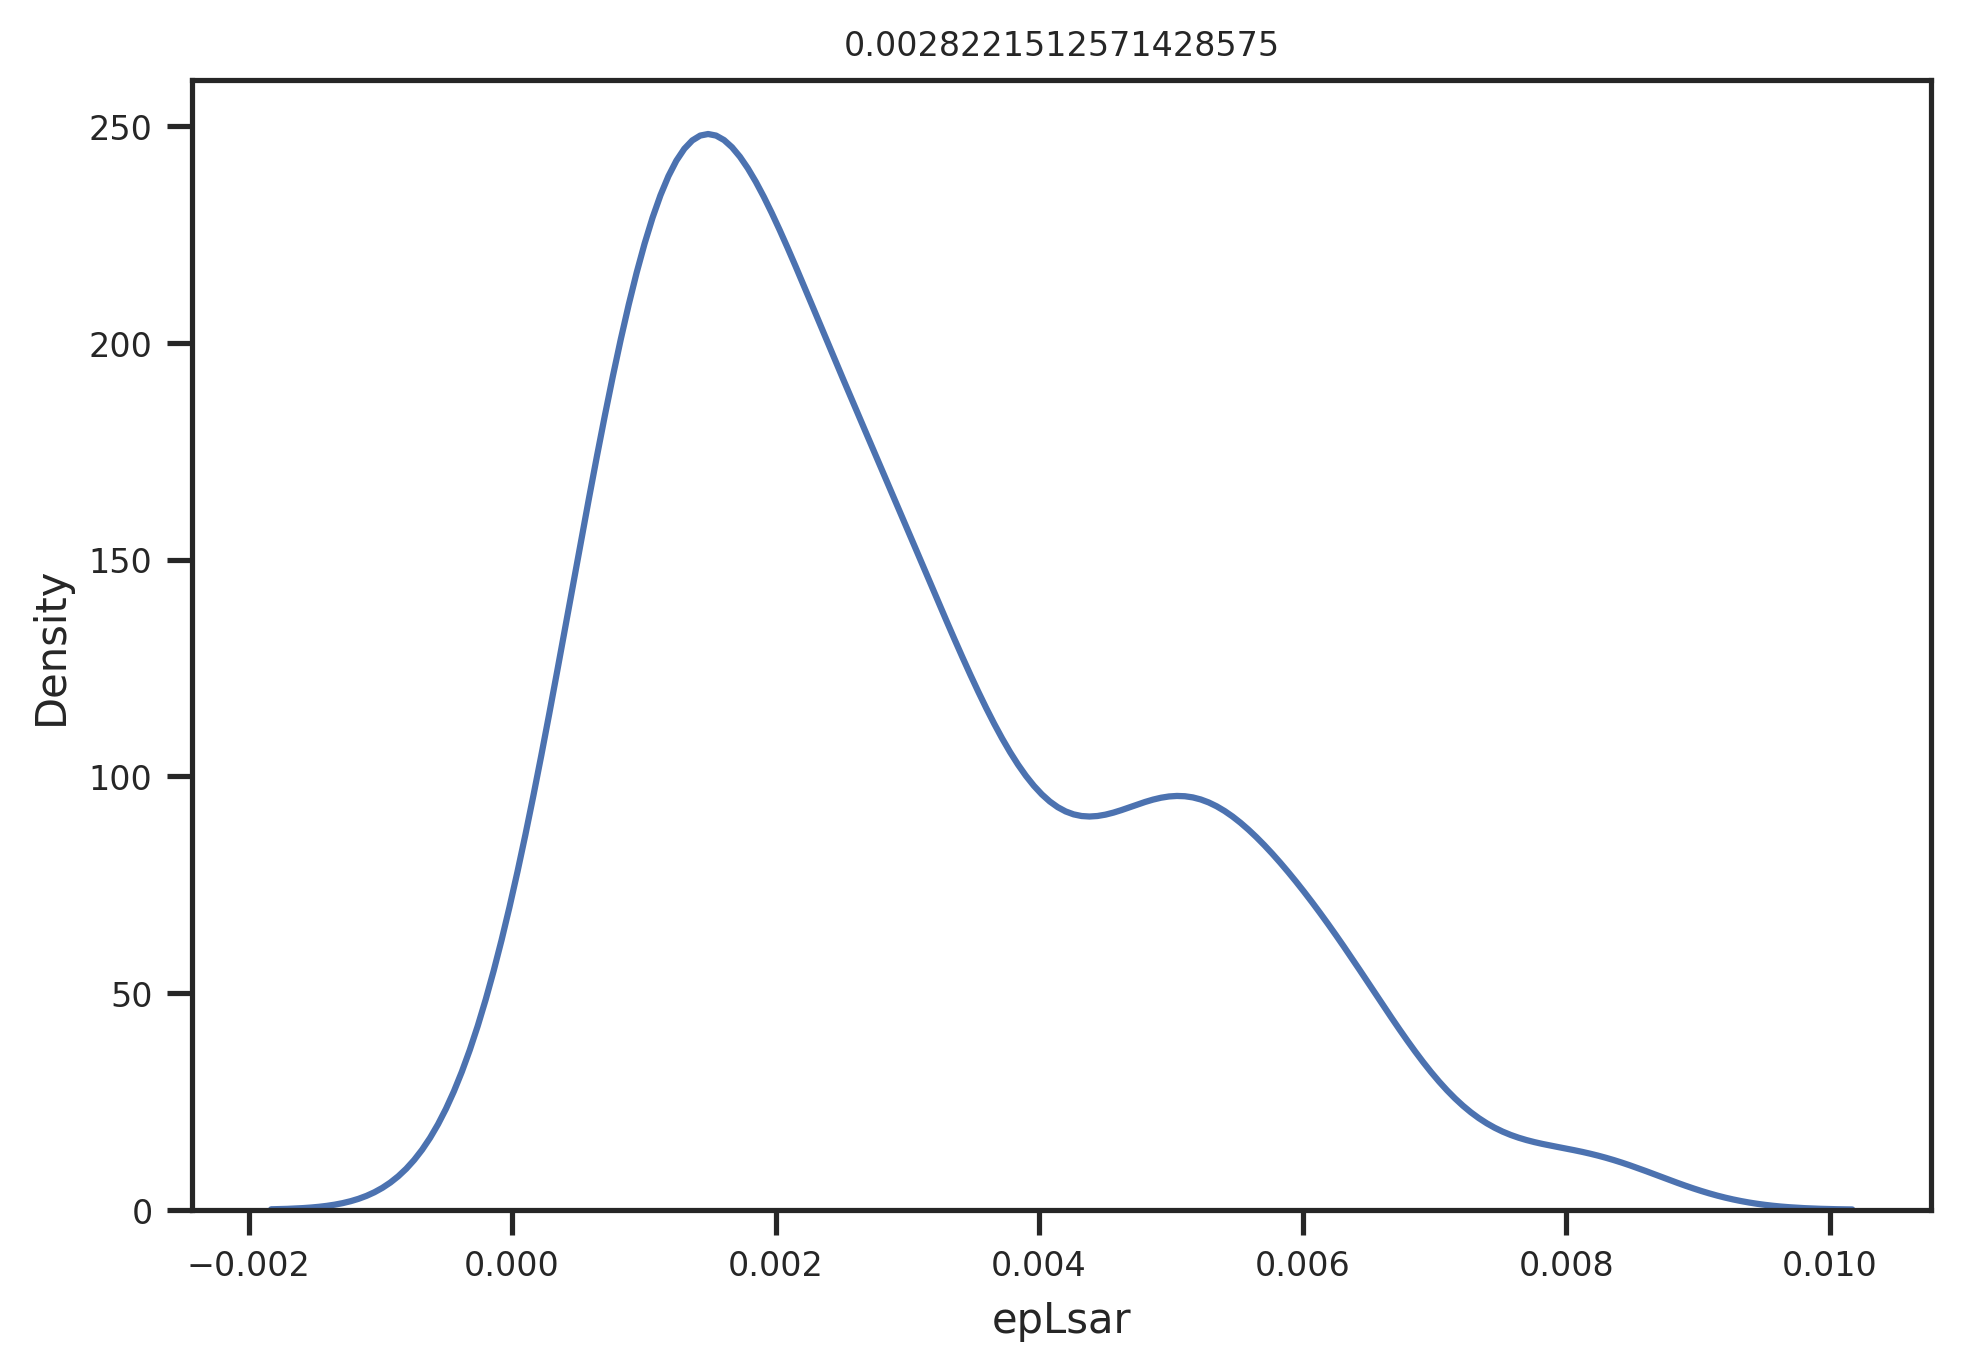

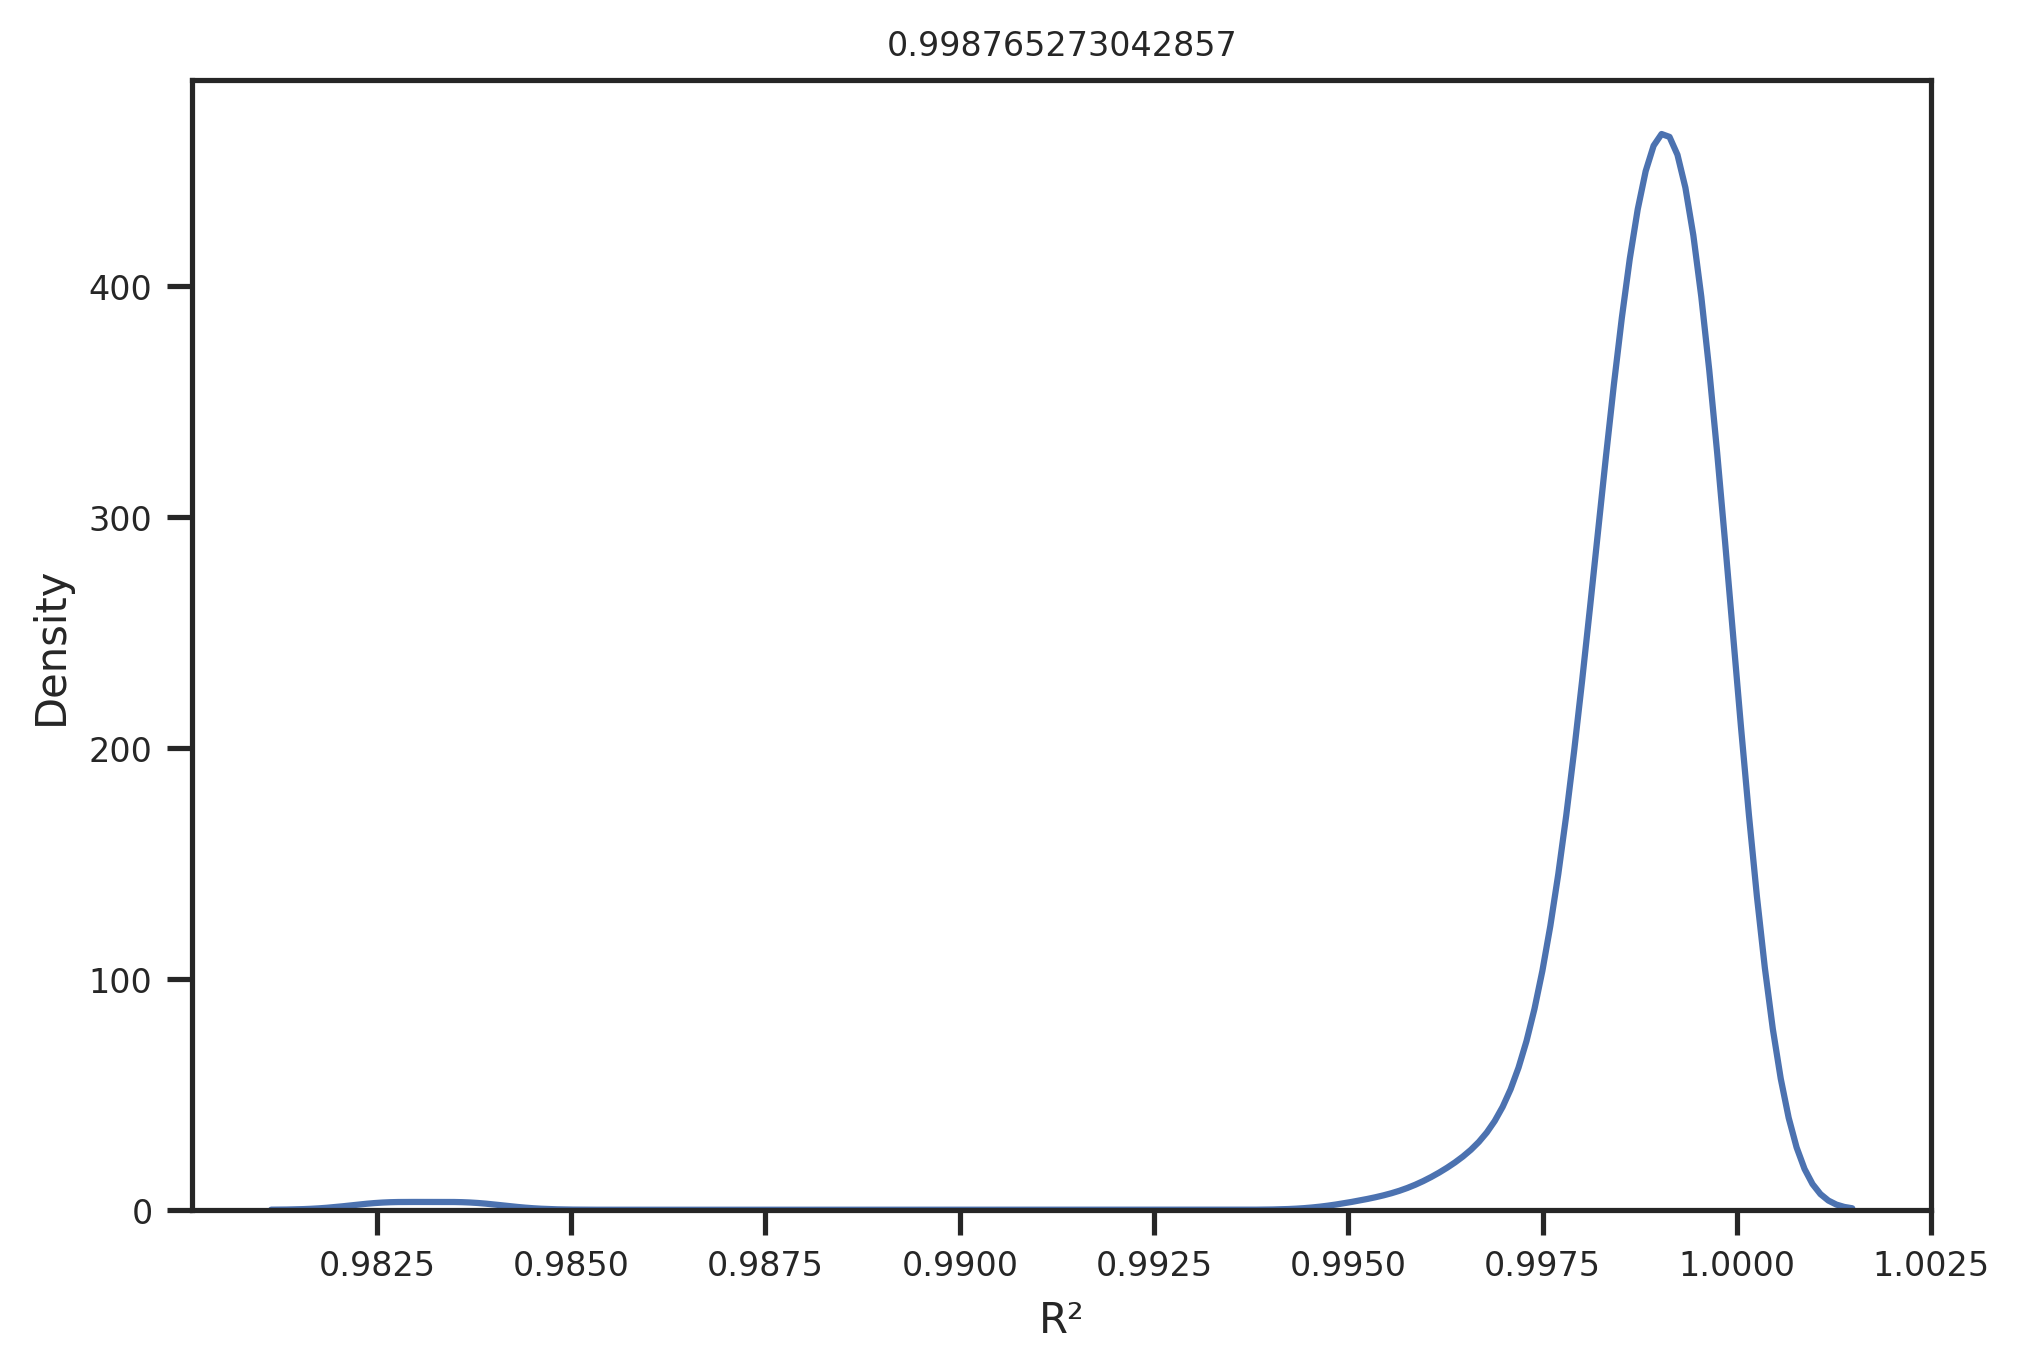

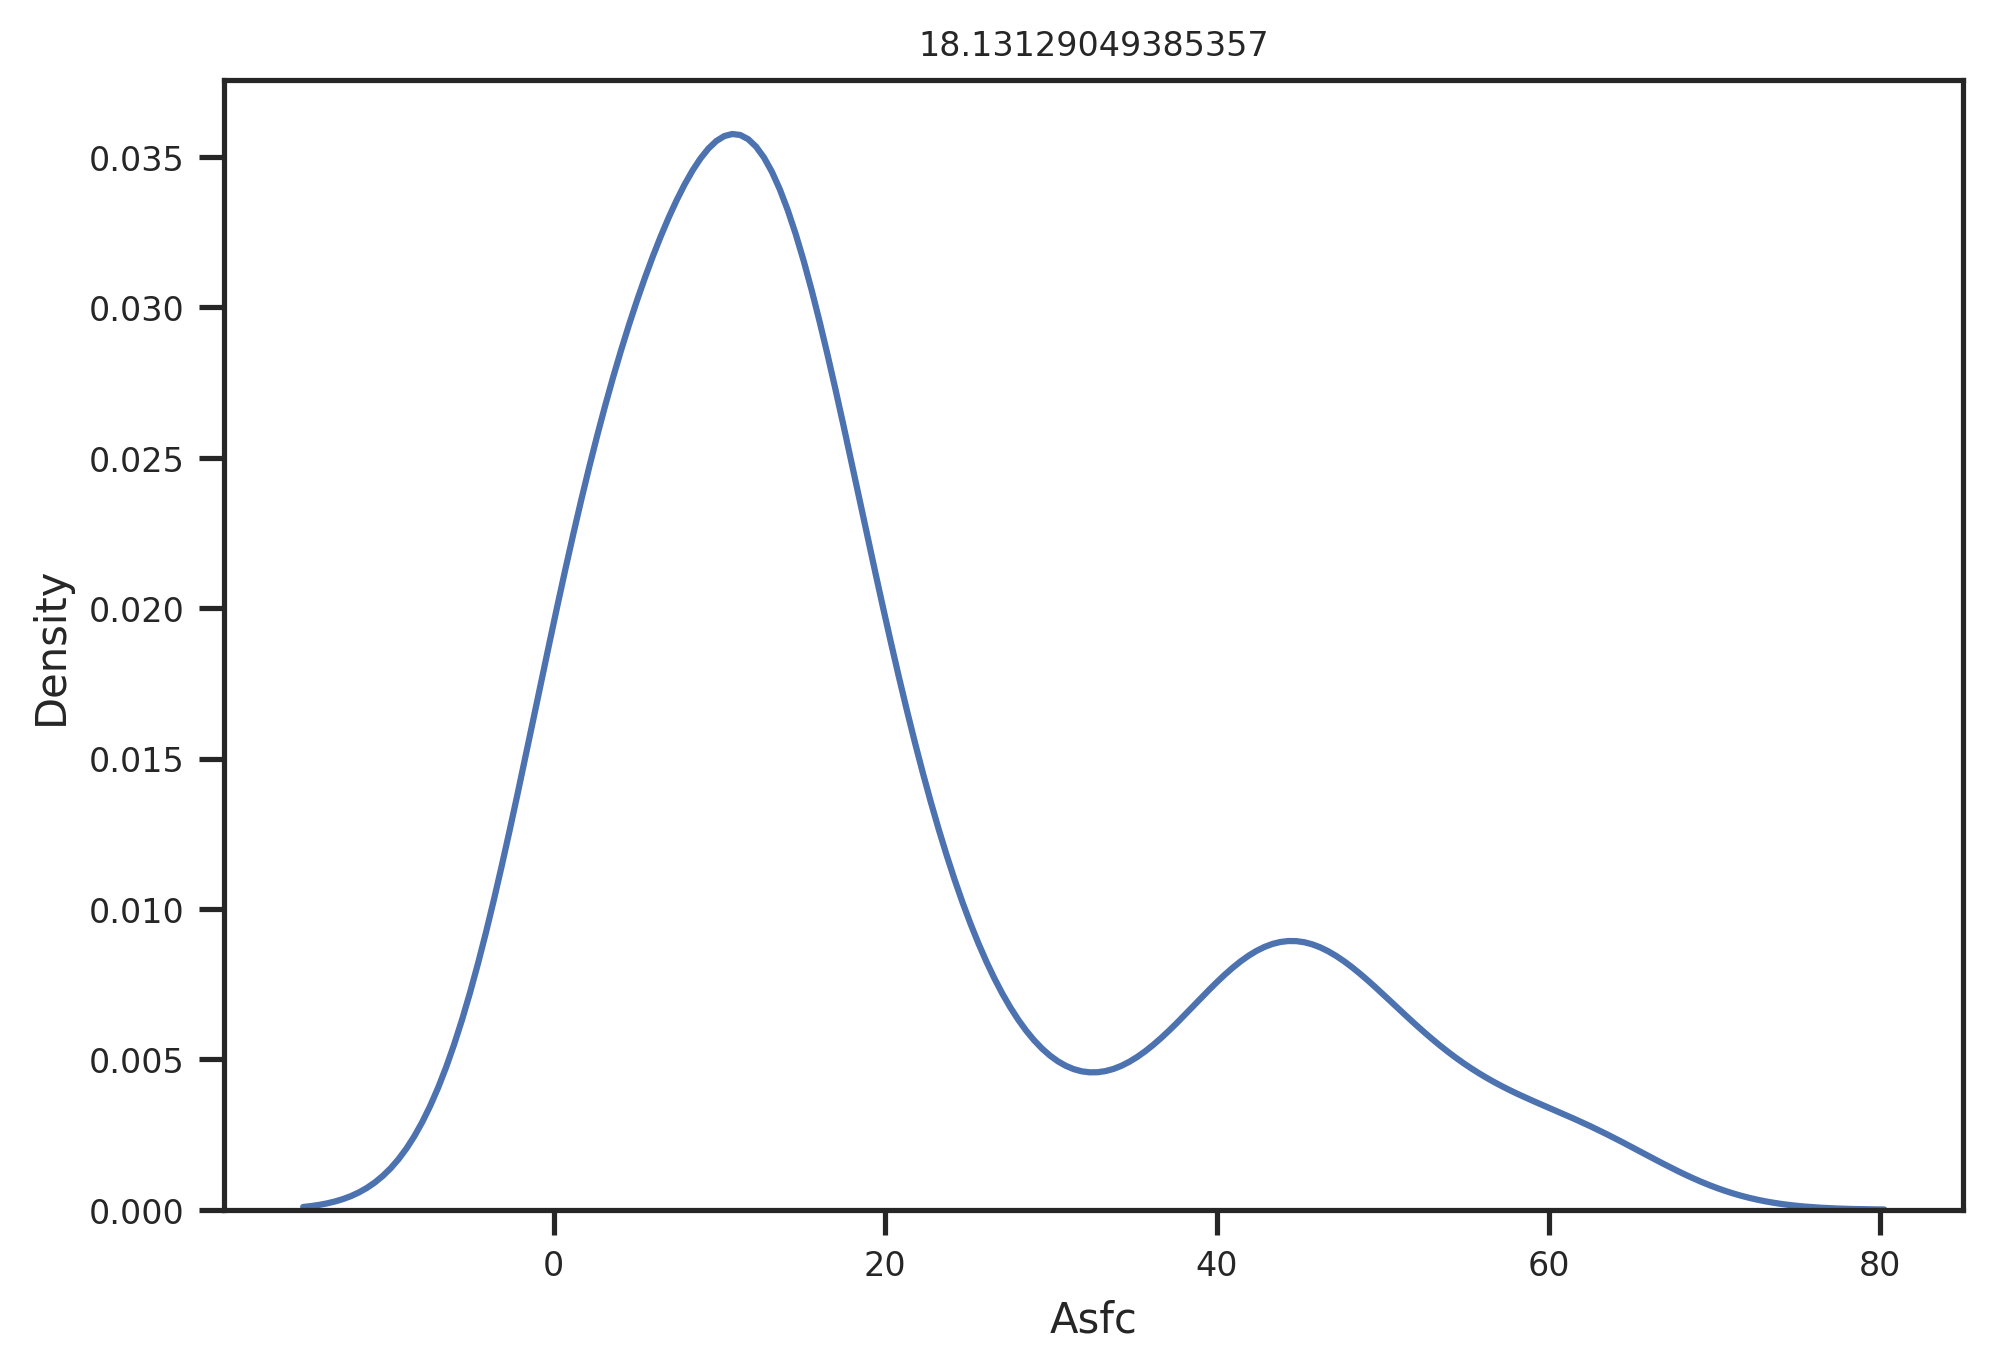

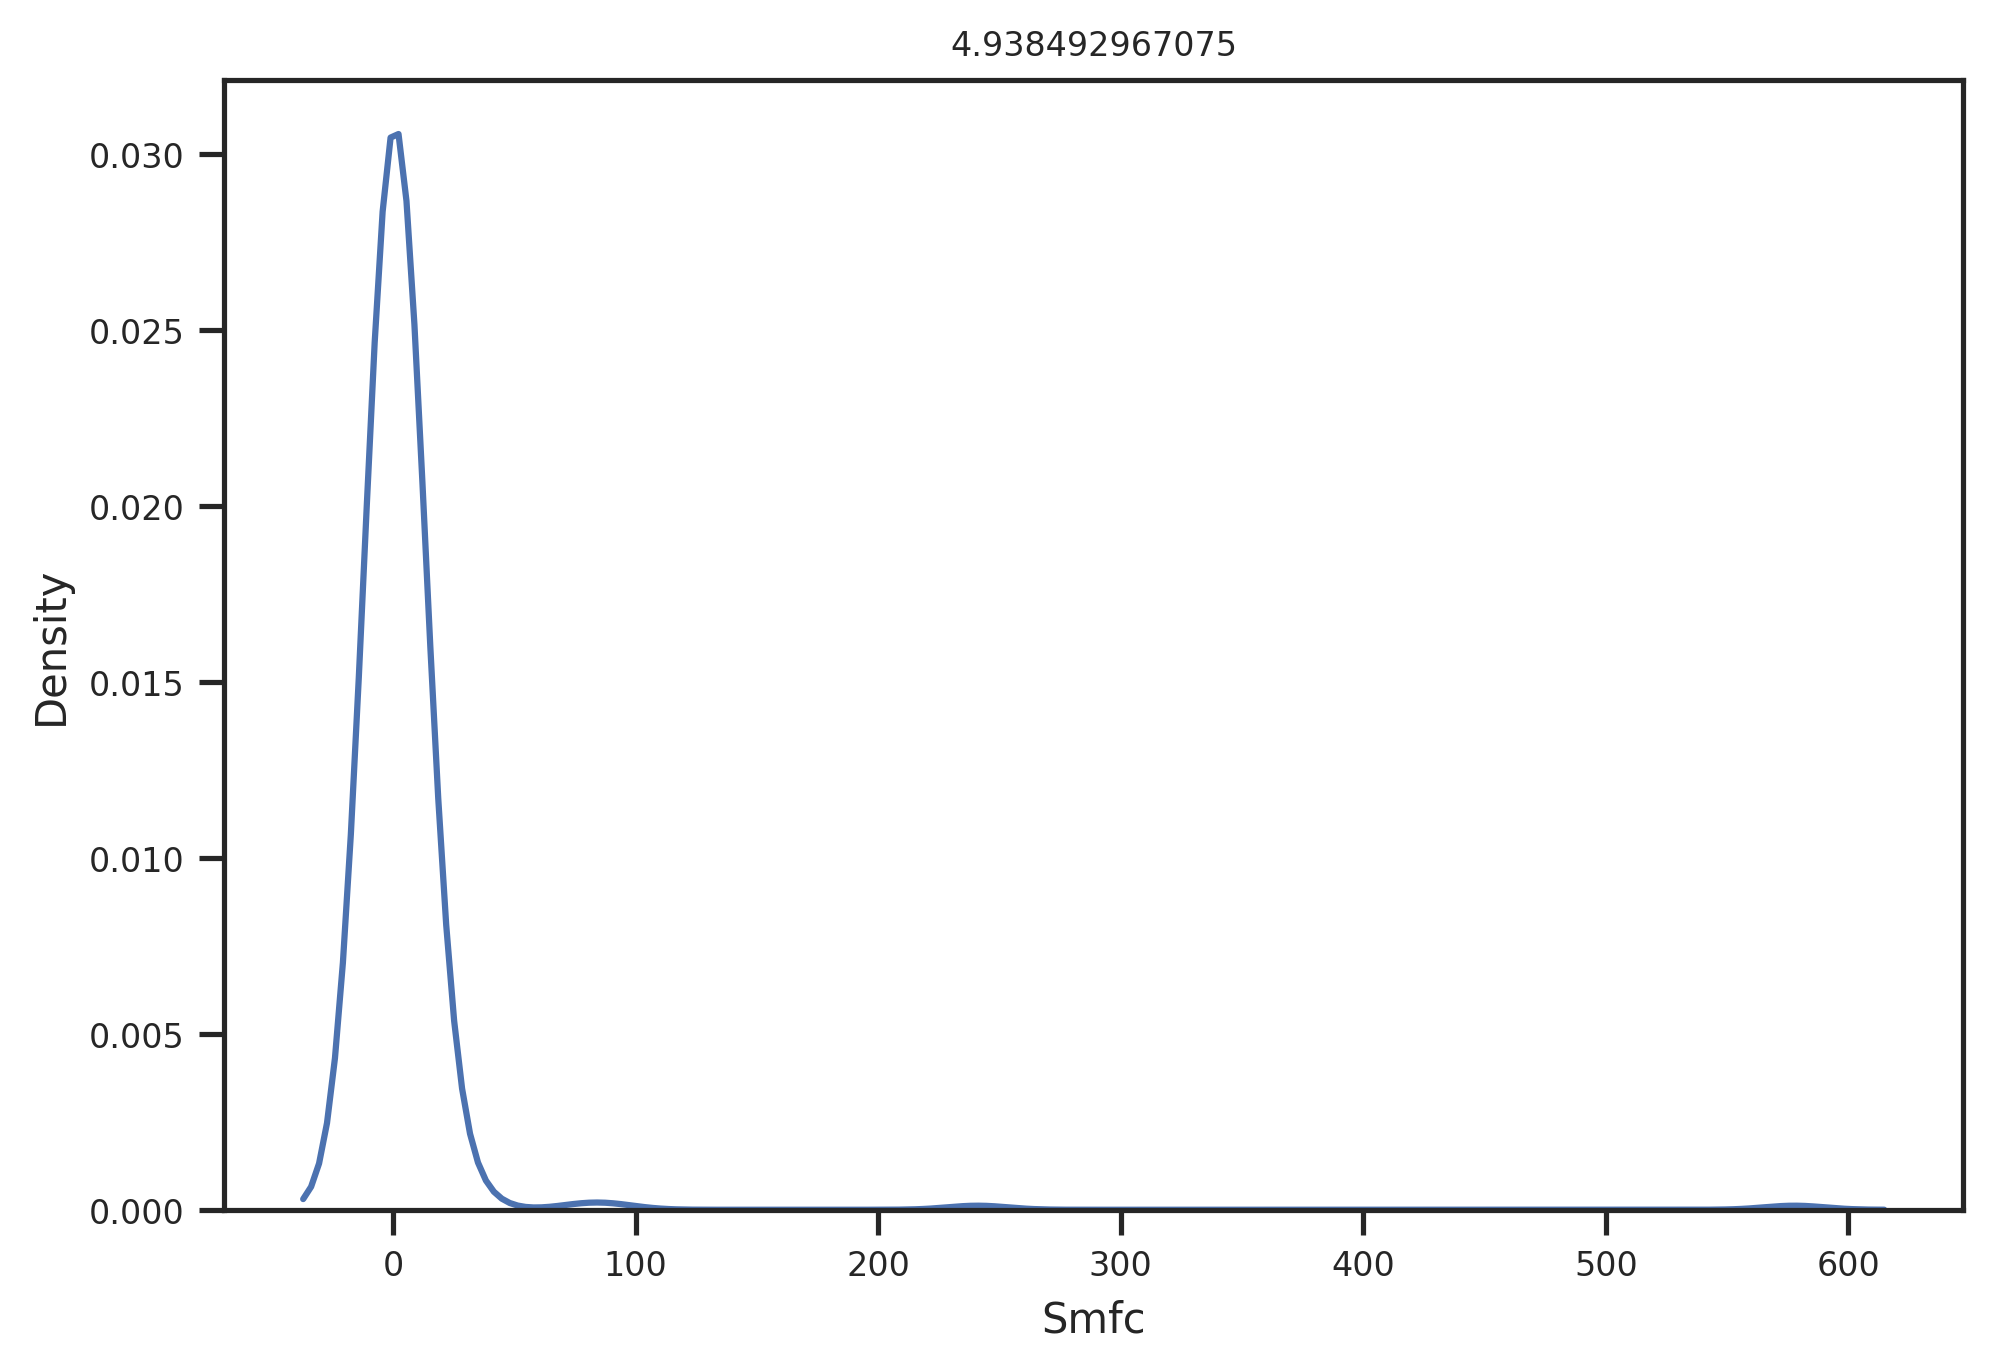

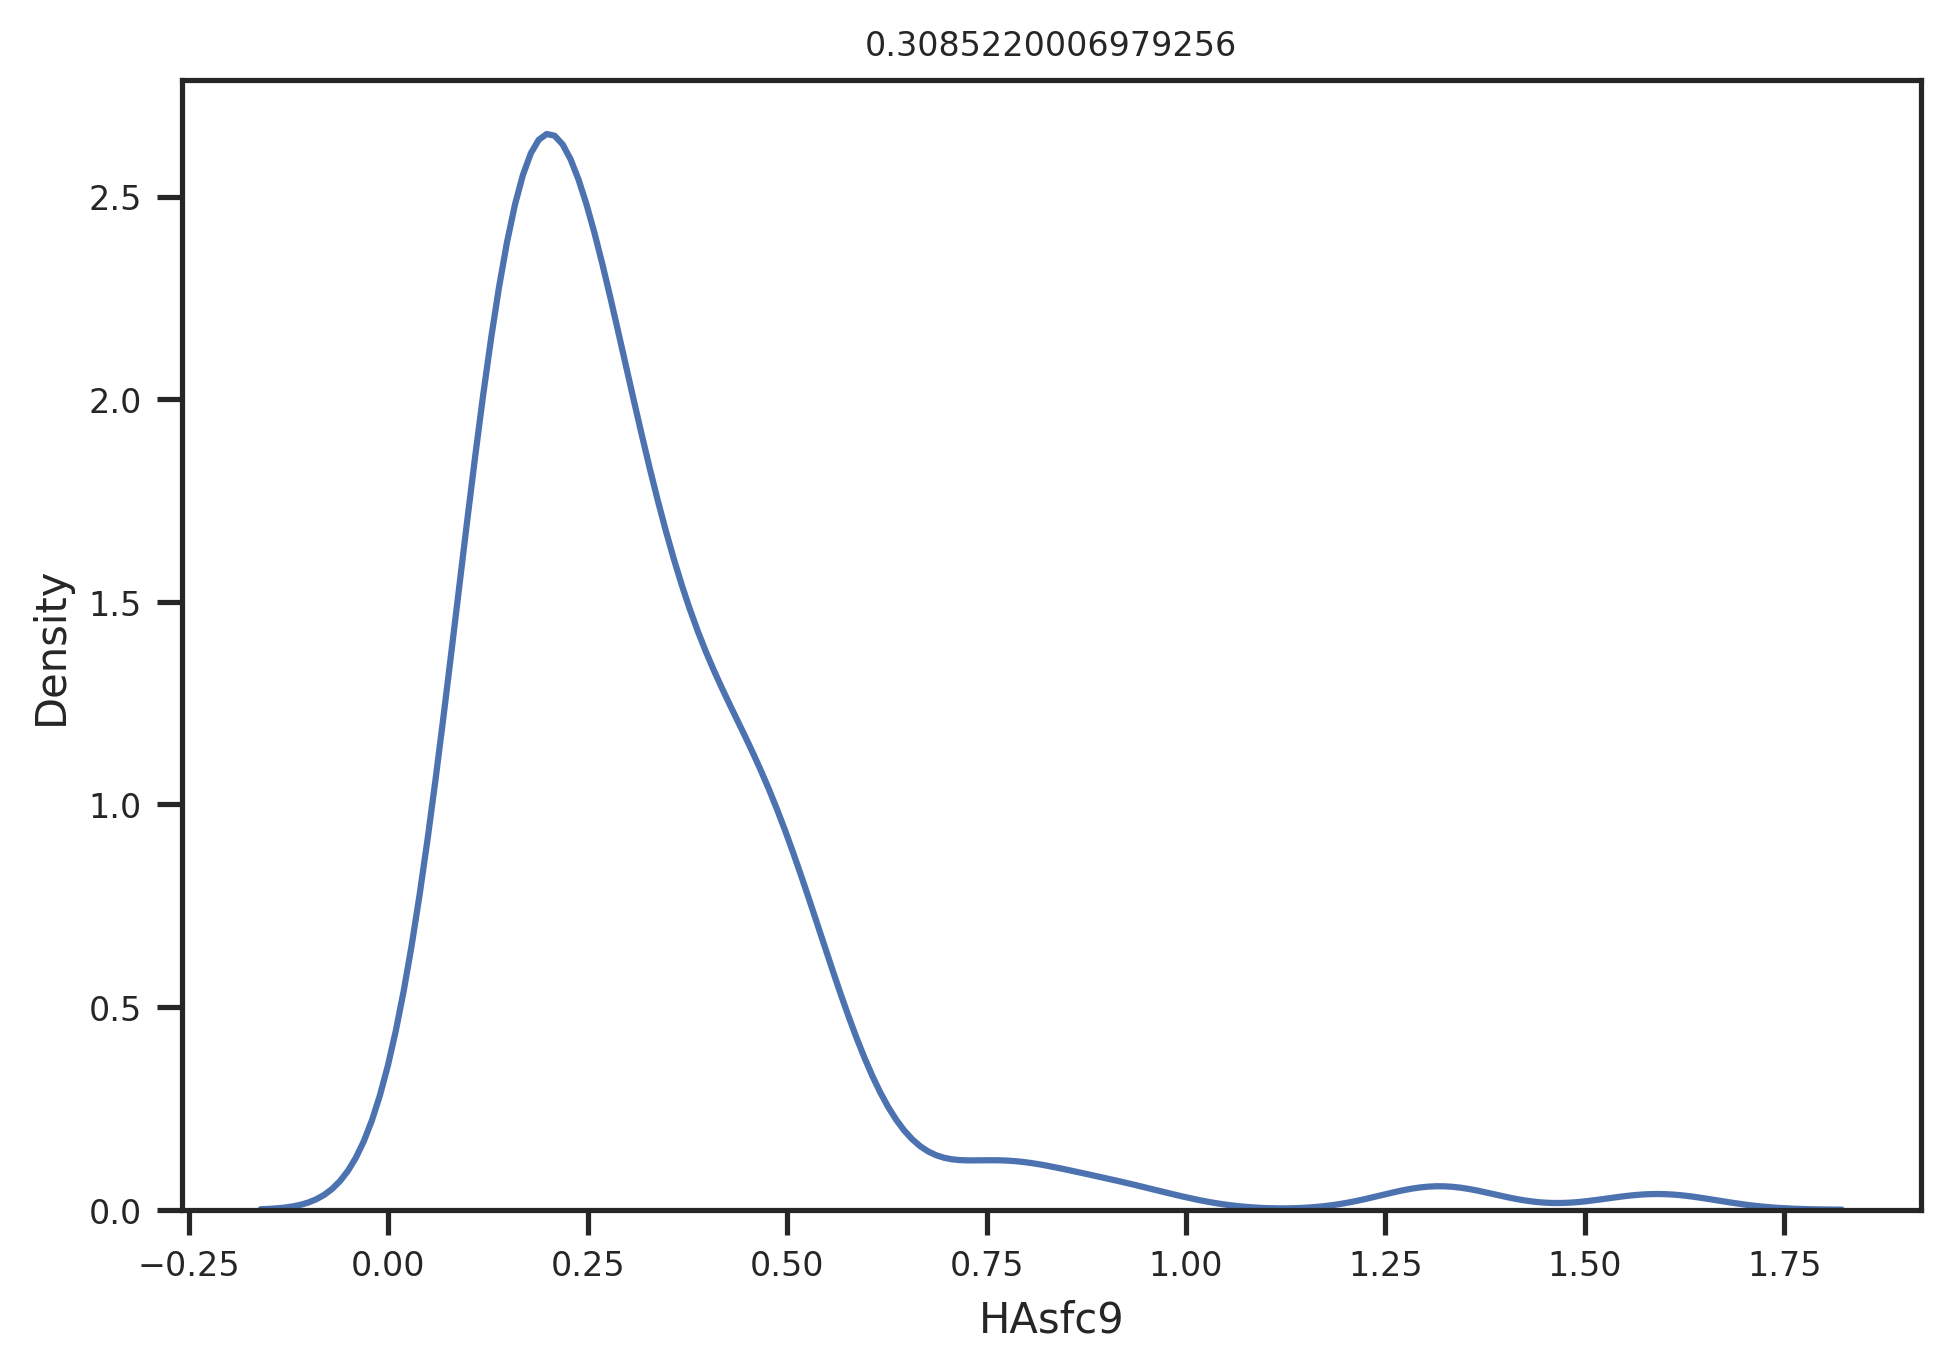

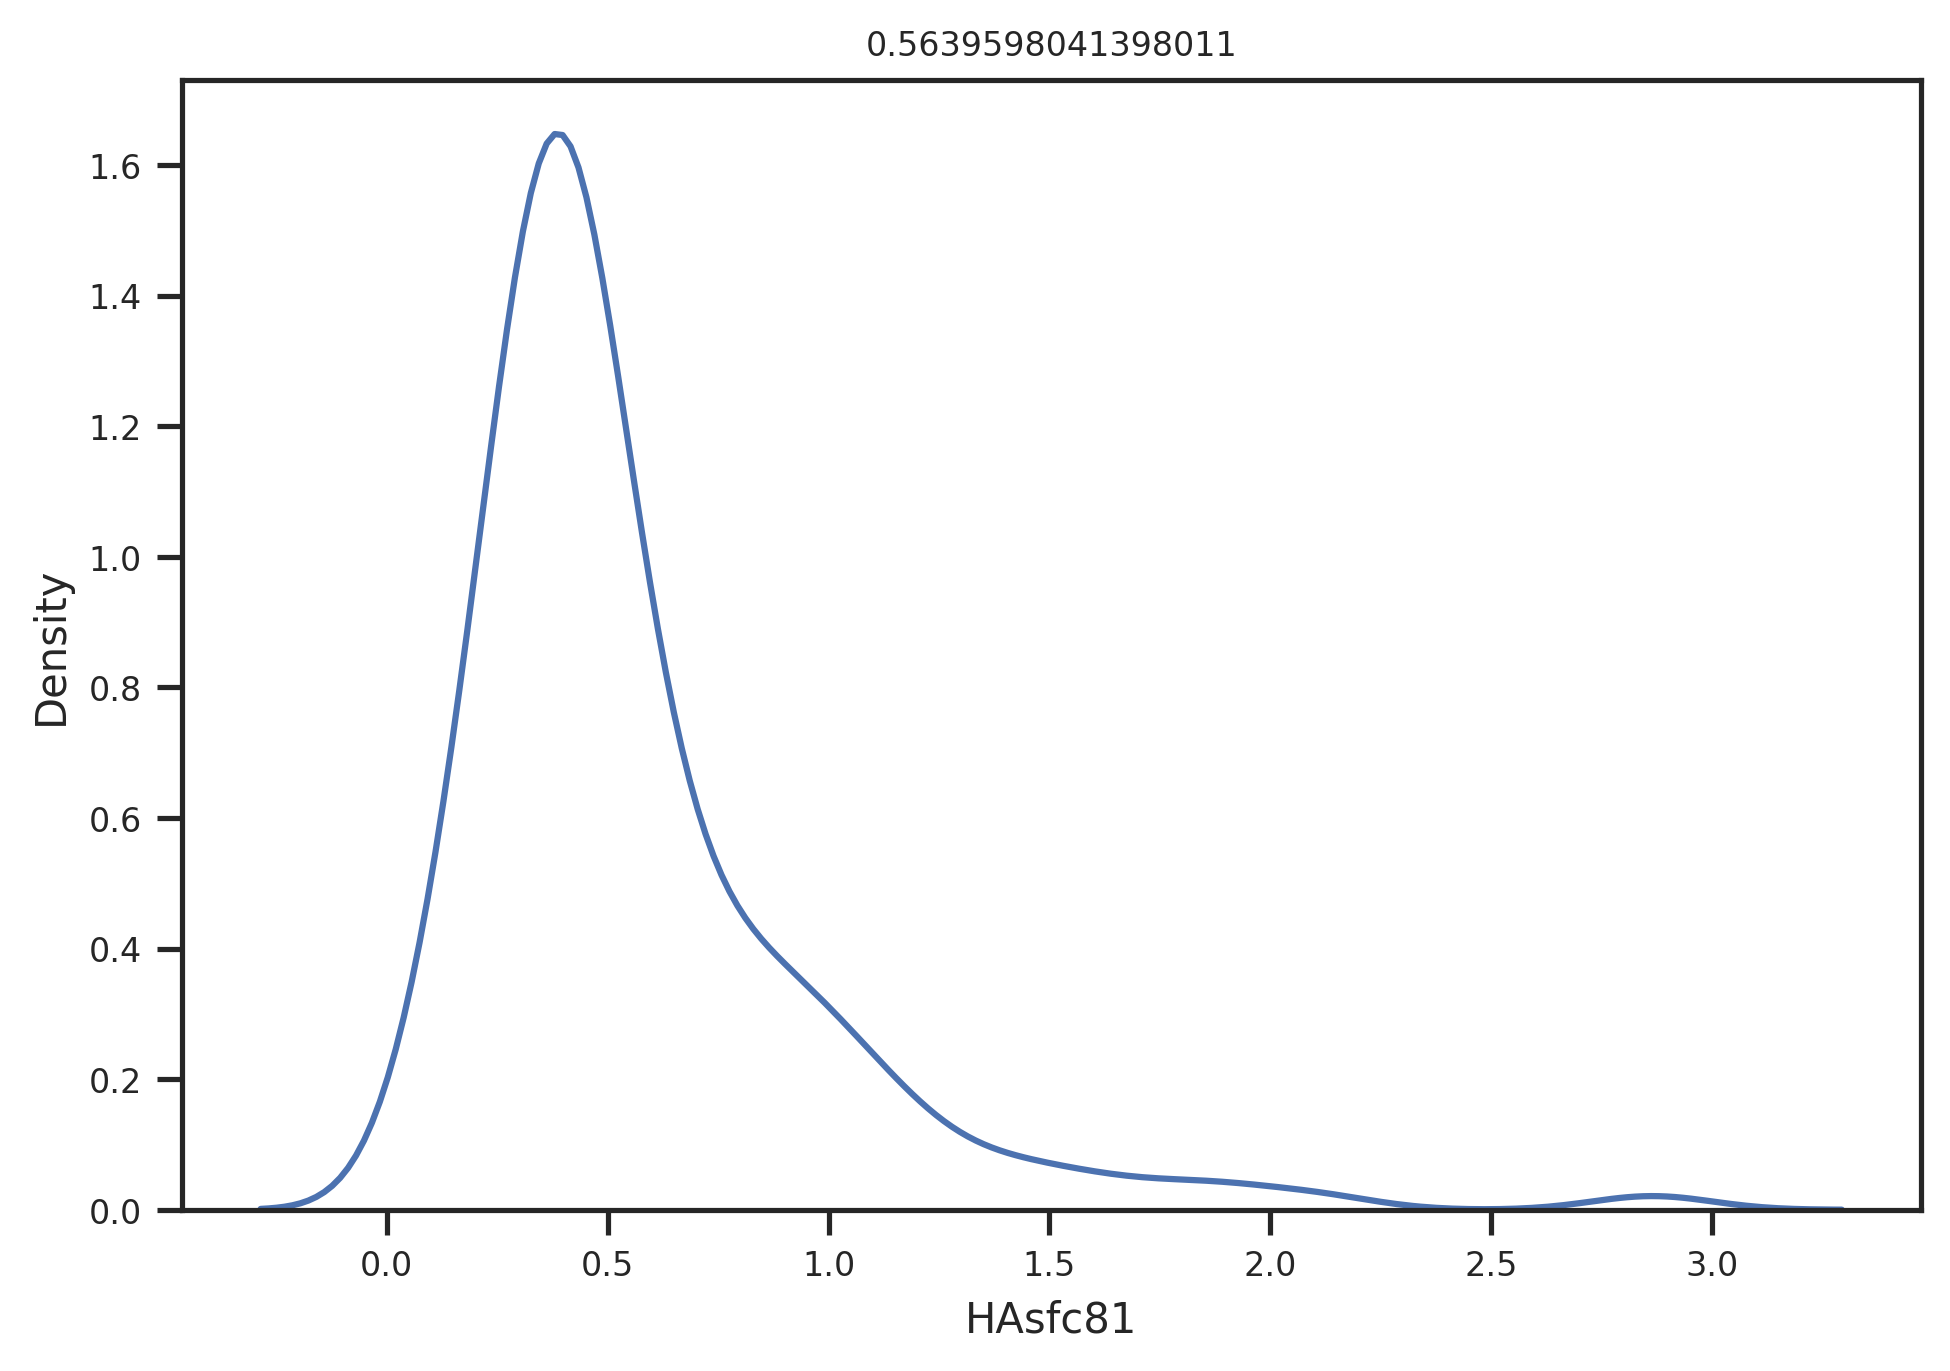

In [19]:
for x in variablesList:
    fig = plt.figure(figsize=(widthInch,heigthInch), dpi= 300, facecolor='w');
    sns.kdeplot(dataDF[x]);
    mean = dataDF[x].mean()
    std = dataDF[x].std()
    dictMeanStd[x] = (mean,std)
    plt.title(mean)
    plt.show()

Smfc seems to have some extremely high values. All other parameters seem to be usable for conversion to z-scores.

Show values again:

In [20]:
dictMeanStd

{'epLsar': (0.0028221512571428575, 0.0019000504797019124),
 'R²': (0.998765273042857, 0.0015328558023807836),
 'Asfc': (18.13129049385357, 16.348381888991312),
 'Smfc': (4.938492967075, 38.106353908569346),
 'HAsfc9': (0.3085220006979256, 0.2211140516395699),
 'HAsfc81': (0.5639598041398011, 0.40668126467296095)}

Perform conversion to z-scores for better numerical stability and model generality

In [21]:
dataZ = dataDF[['TreatmentNumber','SoftwareNumber','DatasetNumber','NameNumber']].copy().reset_index()
for x in variablesList:
    (mean,std) = dictMeanStd[x]
    dataZ["{}_z".format(x)] = (dataDF[x]-mean)/std    
dataZ

,index,TreatmentNumber,SoftwareNumber,DatasetNumber,NameNumber,epLsar_z,R²_z,Asfc_z,Smfc_z,HAsfc9_z,HAsfc81_z
0,0,5,0,0,116,0.839414,-0.017104,-0.448128,-0.120476,-0.806963,-0.512247
1,1,5,1,0,116,0.999368,0.518462,-0.477757,-0.126469,-0.782634,-0.497016
2,2,5,0,0,117,1.601888,-0.509024,-0.276513,-0.119325,-0.584158,-0.662886
3,3,5,1,0,117,1.596720,0.457791,-0.301685,-0.126469,-0.629947,-0.744422
4,4,5,0,0,118,1.168099,-0.221668,-0.393502,-0.121498,-0.269712,-0.370958
...,...,...,...,...,...,...,...,...,...,...,...
275,275,9,1,2,51,0.843056,0.387986,-0.997743,-0.092631,2.388080,1.346868
276,276,9,0,2,52,0.305544,-0.791837,-0.967607,-0.104937,2.014963,2.573677
277,277,9,1,2,52,0.166758,0.635237,-0.940337,-0.126098,2.926894,3.117333
278,278,9,0,2,53,-0.843412,0.042974,-1.022523,-0.085082,0.280534,0.543577


#### Extract data vectors

In [22]:
x1 = dataZ.SoftwareNumber.values
x2 = dataZ.TreatmentNumber.values
x3 = dataZ.NameNumber.values
x1,x2,x3

(array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int8),
 array([ 5,  5,  5,  5,  5,  5,  5,  5,  5

## Explore data <a name="exploration"></a>

#### Compute raw differences

In [23]:
dfRawDiff = dataZ.groupby(['DatasetNumber','TreatmentNumber','NameNumber']).agg(list).applymap(lambda l : l[0]-l[1]).reset_index()

In [24]:
dfRawDiff

,DatasetNumber,TreatmentNumber,NameNumber,index,SoftwareNumber,epLsar_z,R²_z,Asfc_z,Smfc_z,HAsfc9_z,HAsfc81_z
0,0,5,116,-1,-1,-0.159954,-0.535566,0.029629,0.005993,-0.024329,-0.015230
1,0,5,117,-1,-1,0.005168,-0.966815,0.025172,0.007144,0.045788,0.081537
2,0,5,118,-1,-1,0.139785,-0.550288,0.039022,0.004971,0.142403,0.139025
3,0,5,119,-1,-1,0.370716,-0.763882,0.041183,0.007772,0.113397,-0.223817
4,0,5,120,-1,-1,0.138629,-0.150835,0.074677,0.007772,0.179692,0.075084
...,...,...,...,...,...,...,...,...,...,...,...
135,2,9,49,-1,-1,0.576471,-0.505284,-0.008495,0.004560,0.011585,0.007728
136,2,9,50,-1,-1,1.728006,-1.316577,-0.005035,0.005599,0.579285,0.167894
137,2,9,51,-1,-1,-2.151764,-2.659380,-0.008650,0.510897,0.095887,0.165743
138,2,9,52,-1,-1,0.138786,-1.427074,-0.027269,0.021161,-0.911931,-0.543656


#### Show difference between software in raw data

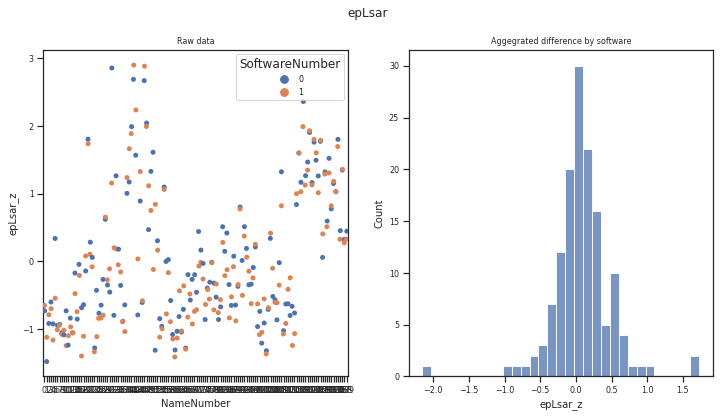

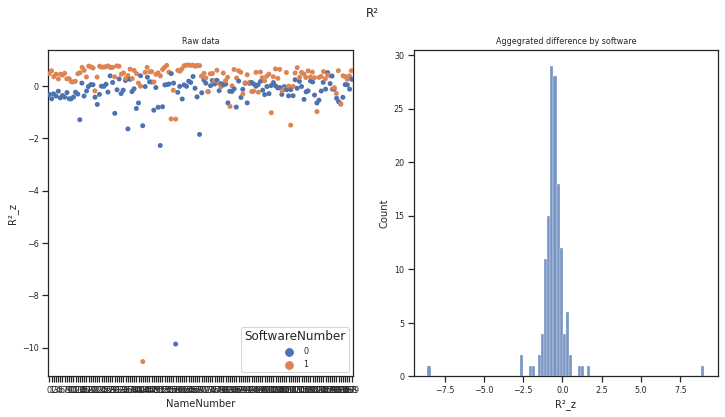

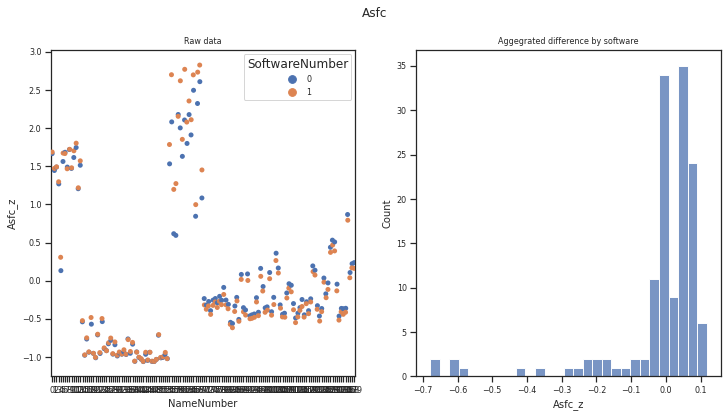

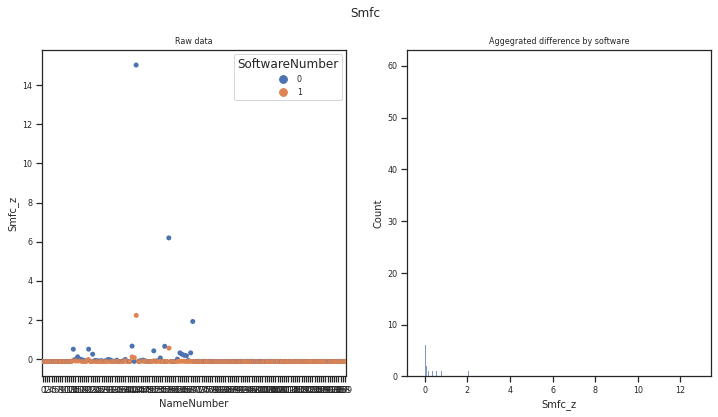

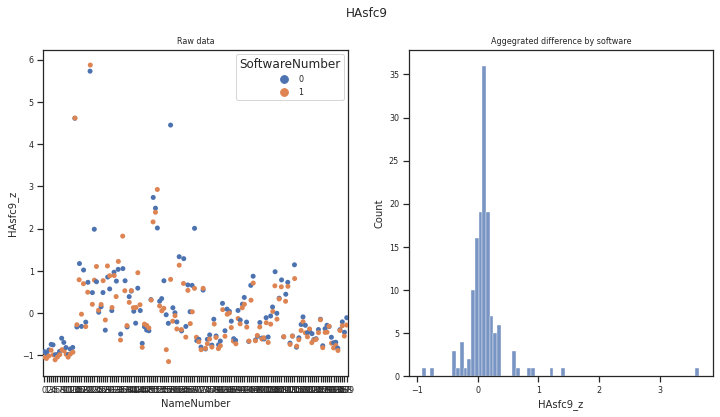

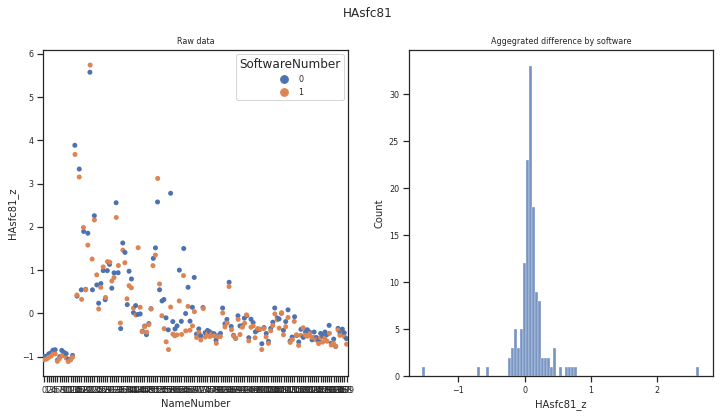

In [25]:
for var in variablesList:
    fig, axes = plt.subplots(1, 2,figsize=(12,6))
    fig.suptitle('{}'.format(var))

    
    sns.stripplot(data=dataZ,x='NameNumber',y='{}_z'.format(var),hue='SoftwareNumber',ax=axes[0]);
    axes[0].set_title('Raw data')

    sns.histplot(data=dfRawDiff,x='{}_z'.format(var),ax=axes[1]);
    axes[1].set_title('Aggegrated difference by software'.format(var))

    plt.show()

### Write out  <a name="write"></a>
Write data to disk so that it is usable for all analysis steps later without the need to run this notebook.

In [26]:
data = [x1,x2,x3,df,dataZ,dictMeanStd,dictTreatment,dictSoftware]

In [27]:
datafile = "../derived_data/preprocessing/preprocessed.dat"

In [28]:
with open(datafile, "wb") as f:
    pickle.dump(data, f)

## Export to html

In [29]:
!jupyter nbconvert --to html Preprocessing.ipynb

[NbConvertApp] Converting notebook Preprocessing.ipynb to html
[NbConvertApp] Writing 1594203 bytes to Preprocessing.html
